In [40]:
import sys
import os
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model
from keras.layers import Dropout, Flatten, Dense, Activation, BatchNormalization
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras import callbacks
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
train_data_dir = './dataset/train'
validation_data_dir = './dataset/val'

In [42]:
img_width, img_height = 224, 224
nb_train_samples = 2547 
nb_validation_samples = 660

nb_filters1 = 8
nb_filters2 = 16
nb_filters3 = 32
nb_filters4 = 64
nb_filters5 = 128

conv1_size = 3
conv2_size = 3
conv3_size = 3
conv4_size = 3
conv5_size = 3

pool_size = 2
classes_num = 2
batch_size = 16
lr = 0.0001

In [7]:
model = Sequential()
model.add(Conv2D(nb_filters1, (conv1_size, conv1_size), input_shape=(img_width, img_height, 3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

model.add(Conv2D(nb_filters2, (conv2_size, conv2_size)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

model.add(Conv2D(nb_filters3, (conv3_size, conv3_size)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

model.add(Conv2D(nb_filters4, (conv4_size, conv4_size)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

model.add(Conv2D(nb_filters5, (conv5_size, conv5_size)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.3))
model.add(Dense(classes_num, activation='softmax'))

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 8)       224       
_________________________________________________________________
batch_normalization_1 (Batch (None, 222, 222, 8)       32        
_________________________________________________________________
activation_1 (Activation)    (None, 222, 222, 8)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 8)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 109, 109, 16)      1168      
_________________________________________________________________
batch_normalization_2 (Batch (None, 109, 109, 16)      64        
_________________________________________________________________
activation_2 (Activation)    (None, 109, 109, 16)     

In [43]:
epochs=100
sgd = optimizers.SGD(lr = lr, decay = lr/epochs, momentum = 0.9, nesterov = False)

In [10]:
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [44]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    width_shift_range=.15,
    height_shift_range=.15,
    rotation_range=45,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True)
test_datagen = ImageDataGenerator(
    rescale=1. / 255)

In [45]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

Found 2547 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


In [13]:
r = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples//batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples//batch_size)

Epoch 1/100
159/159 [==============================] - 169s 1s/step - loss: 0.6543 - accuracy: 0.6962 - val_loss: 0.5878 - val_accuracy: 0.5442
Epoch 2/100
159/159 [==============================] - 151s 951ms/step - loss: 0.5225 - accuracy: 0.7539 - val_loss: 1.6955 - val_accuracy: 0.5606
Epoch 3/100
159/159 [==============================] - 153s 962ms/step - loss: 0.4777 - accuracy: 0.7791 - val_loss: 0.4105 - val_accuracy: 0.7624
Epoch 4/100
159/159 [==============================] - 149s 936ms/step - loss: 0.4911 - accuracy: 0.7602 - val_loss: 0.6368 - val_accuracy: 0.7562
Epoch 5/100
159/159 [==============================] - 147s 924ms/step - loss: 0.4478 - accuracy: 0.7882 - val_loss: 0.4365 - val_accuracy: 0.7516
Epoch 6/100
159/159 [==============================] - 158s 996ms/step - loss: 0.4475 - accuracy: 0.7874 - val_loss: 0.3356 - val_accuracy: 0.7593
Epoch 7/100
159/159 [==============================] - 160s 1s/step - loss: 0.4338 - accuracy: 0.7922 - val_loss: 0.3791 

Epoch 57/100
159/159 [==============================] - 168s 1s/step - loss: 0.3319 - accuracy: 0.8503 - val_loss: 0.3056 - val_accuracy: 0.8385
Epoch 58/100
159/159 [==============================] - 161s 1s/step - loss: 0.3167 - accuracy: 0.8582 - val_loss: 0.3497 - val_accuracy: 0.8571
Epoch 59/100
159/159 [==============================] - 168s 1s/step - loss: 0.3285 - accuracy: 0.8459 - val_loss: 0.2625 - val_accuracy: 0.8494
Epoch 60/100
159/159 [==============================] - 158s 992ms/step - loss: 0.3175 - accuracy: 0.8531 - val_loss: 0.3477 - val_accuracy: 0.8789
Epoch 61/100
159/159 [==============================] - 161s 1s/step - loss: 0.3225 - accuracy: 0.8451 - val_loss: 0.1797 - val_accuracy: 0.8432
Epoch 62/100
159/159 [==============================] - 169s 1s/step - loss: 0.3062 - accuracy: 0.8601 - val_loss: 0.2935 - val_accuracy: 0.8602
Epoch 63/100
159/159 [==============================] - 163s 1s/step - loss: 0.3142 - accuracy: 0.8582 - val_loss: 0.5242 - val

In [15]:
target_dir = './models/'
if not os.path.exists(target_dir):
  os.mkdir(target_dir)
model.save('./models/MelanomaModel.h5')
model.save_weights('./models/MelanomaWeights.h5')

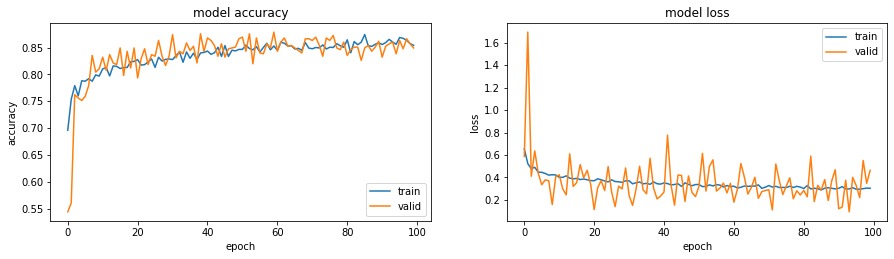

In [14]:
import matplotlib.pyplot as plt 
plt.figure(1, figsize = (15,8)) 
    
plt.subplot(221)  
plt.plot(r.history['accuracy'])  
plt.plot(r.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 
    
plt.subplot(222)  
plt.plot(r.history['loss'])  
plt.plot(r.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 

plt.show()

In [16]:
scores = model.evaluate_generator(validation_generator, steps=42)
print("Accuracy = ", scores[1])

Accuracy =  0.8560606241226196


In [17]:
scores

[0.14291632175445557, 0.8560606241226196]

In [46]:
test_dir = './dataset/test'
check_datagen = ImageDataGenerator(
    rescale=1. / 255)

check_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

Found 90 images belonging to 2 classes.


In [47]:
scores = model.evaluate_generator(check_generator, steps=5)

In [48]:
scores

[0.3325646221637726, 0.875]

In [49]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.models import Sequential, load_model

img_width, img_height = 224, 224
model_path = './models/MelanomaModel.h5'
model_weights_path = './models/MelanomaWeights.h5'
model = load_model(model_path)
model.load_weights(model_weights_path)

In [61]:
# model.summary()
type(check_generator)

keras.preprocessing.image.DirectoryIterator

In [62]:
predIdxs = model.predict_generator(check_generator,steps=6) # BatchSize + 1 add krna idhr
len(predIdxs)

90

In [63]:
predIdxs = np.argmax(predIdxs, axis=1)

In [64]:
len(check_generator.classes)

90

In [65]:
len(predIdxs)

90

In [66]:
from sklearn.metrics import classification_report
print(classification_report(check_generator.classes, predIdxs,target_names=check_generator.class_indices.keys()))

              precision    recall  f1-score   support

      benign       0.51      0.48      0.49        50
   malignant       0.40      0.42      0.41        40

    accuracy                           0.46        90
   macro avg       0.45      0.45      0.45        90
weighted avg       0.46      0.46      0.46        90



In [6]:
img = './dataset/test/benign/196.jpg'

In [8]:
from keras.preprocessing import image
import numpy as np

img = image.load_img(img, target_size=(224,224))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255. 

In [9]:
img_tensor.shape

(1, 224, 224, 3)

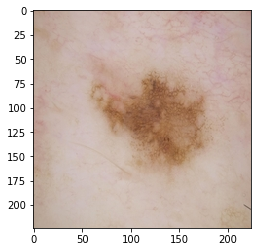

In [11]:
plt.imshow(img_tensor[0])
plt.show()

In [12]:
from keras import models

layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model=models.Model(inputs=model.input, outputs=layer_outputs)

In [13]:
activation = activation_model.predict(img_tensor)

In [17]:
first_layer_activation=activation[0]
print(first_layer_activation.shape)

(1, 222, 222, 8)


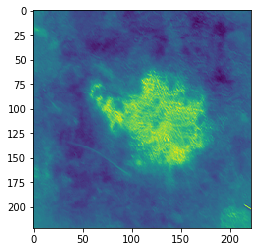

In [18]:
plt.imshow(first_layer_activation[0,:,:,4], cmap='viridis')

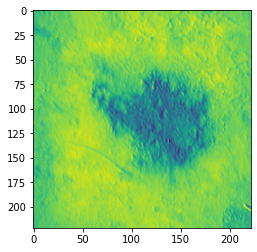

In [19]:
plt.imshow(first_layer_activation[0,:,:,7], cmap='viridis')

In [33]:
for index,layer in enumerate(model.layers):
    print(f'Index: {index}, Layer: {layer}')

Index: 0, Layer: <keras.layers.convolutional.Conv2D object at 0x000001ED33525488>
Index: 1, Layer: <keras.layers.normalization.BatchNormalization object at 0x000001ED3359E0C8>
Index: 2, Layer: <keras.layers.core.Activation object at 0x000001ED3359EB88>
Index: 3, Layer: <keras.layers.pooling.MaxPooling2D object at 0x000001ED33585B88>
Index: 4, Layer: <keras.layers.convolutional.Conv2D object at 0x000001ED336C7B88>
Index: 5, Layer: <keras.layers.normalization.BatchNormalization object at 0x000001ED336D5F08>
Index: 6, Layer: <keras.layers.core.Activation object at 0x000001ED336D7388>
Index: 7, Layer: <keras.layers.pooling.MaxPooling2D object at 0x000001ED3479B6C8>
Index: 8, Layer: <keras.layers.convolutional.Conv2D object at 0x000001ED346B6D88>
Index: 9, Layer: <keras.layers.normalization.BatchNormalization object at 0x000001ED347A9F48>
Index: 10, Layer: <keras.layers.core.Activation object at 0x000001ED34802F08>
Index: 11, Layer: <keras.layers.pooling.MaxPooling2D object at 0x000001ED348

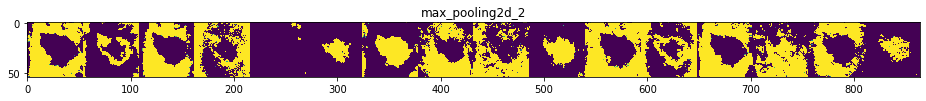

In [36]:
layer_names=[]
for layer in model.layers[:24]:
    layer_names.append(layer.name)
    
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activation):
    n_features=layer_activation.shape[-1]
    size=layer_activation.shape[1]

    n_cols= n_features // images_per_row
    display_grid=np.zeros((size*n_cols, images_per_row * size))
    
for col in range(n_cols):
    for row in range(images_per_row):
        channel_image = layer_activation[0,:,:,col*images_per_row+row]
        channel_image -= channel_image.mean()
        channel_image /= channel_image.std()
        channel_image *= 64
        channel_image *=128
        channel_image = np.clip(channel_image, 0, 255).astype('uint8')
        display_grid[col*size : (col+1)*size, row*size: (row+1)*size] = channel_image
        
scale = 1. / size
plt.figure(figsize=(scale*display_grid.shape[1], scale*display_grid.shape[0]))
plt.title(layer_name)
plt.grid(False)
plt.imshow(display_grid, aspect='auto', cmap='viridis')